<a href="https://colab.research.google.com/github/doxenix/WUM/blob/main/Zadanie_4_Dominik_Zalewski_s24216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Podział zbioru treningowego i miary jakości

#### Danijel Koržinek <danijel@pja.edu.pl>

Uruchom poniższy blok:

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)      
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Zacznijmy od wczytania zbioru danych z biblioteki `sklearn.datasets`. Zapisz wynik funkcji `load_breast_cancer` do zmiennej:

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

Wypisz wszystkie składowe `keys()` otrzymanego zbioru:

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Zobaczmy składową `DESCR`:

In [ ]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

Jest to zbiór przeznaczony do binarnej klasyfikacji rzeczywistych danych liczbowych. Wypisz nazwy cech (`feature_names`) i klas (`target_names`):

In [ ]:
print(data.feature_names)
print('\n')
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


['malignant' 'benign']


Wypisz rozmiary tablic danych (`data`) i klas (`target`):

In [ ]:
print(data.data.shape)
print('\n')
print(data.target.shape)

(569, 30)


(569,)


## Podział danych

Użyj metody `train_test_split` z modułu `sklearn.model_selection` żeby podzielić zbiór na część treningową (90%) i testową (10%). Użyj straktyfikacji w podziale danych:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.9)

Wczytaj następujące klasyfikatory:

```
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
```

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

Dla każdego klasyfikatora (skonstruowanego domyślnymi parametrami) zastosuj odpowiednio metody `fit` na danych treningowych i `score` na danych testowych żeby otrzymać jego dokładność. Zaleca się zrobić słownik poszczególnych modeli i uruchomić wszystko w pętli `for`. Co się stanie jak zmienimy podział danych (użyjemy metody split ponownie)?

In [ ]:
from sklearn.metrics import accuracy_score

models = {
          "LinearRegression" : LinearRegression(),
          "GPC" : GaussianProcessClassifier(),
          "GaussianNB" : GaussianNB(),
          "MLPClassifier" : MLPClassifier(),
          "SVC" : SVC(),
          "KNN" : KNeighborsClassifier(),
          "SGD" : SGDClassifier()
         }
print('Score data split 0.9:')
for name, model in models.items():
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  print(name, score)

#change data split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.8)

print("\nScore data split 0.8:")
for name, model in models.items():
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  print(name, score)


"""
Po zmiane splitu danych z 0.9 na 0.8 wynik score modeli: LinearRegression, GaussianProcessClassifier , 
MLPClassifier, SGD poprawiły się bardzo zauważalnie, w pozostałych score nieco zmalalł, jedank rożnica nie
jest duża
"""
 

Score data split 0.9:
LinearRegression 0.4068291305565134
GPC 0.8401559454191033
GaussianNB 0.9376218323586745
MLPClassifier 0.8304093567251462
SVC 0.8713450292397661
KNN 0.9083820662768031
SGD 0.9005847953216374

Score data split 0.8:
LinearRegression 0.6052361001944166
GPC 0.9100877192982456
GaussianNB 0.9254385964912281
MLPClassifier 0.9035087719298246
SVC 0.9035087719298246
KNN 0.9100877192982456
SGD 0.4473684210526316


'\nPo zmiane splitu danych z 0.9 na 0.8 wynik score modeli: LinearRegression, GaussianProcessClassifier , \nMLPClassifier, SGD poprawiły się bardzo zauważalnie, w pozostałych score nieco zmalalł, jedank rożnica nie\njest duża\n'

## Walidacja krzyżowa

Przy niewielkim zbiorze danych, ciężko jest wydzielić reprezentatywny zbiór testowy. Jeden ze sposobów jest uruchomić cały proces kilka razy i raportować średnie i odchylenia uzyskanych wyników.

Lepszym sposobem jest podzielić cały zbiór danych na `K` paczek i iteracyjnie użyć każdej paczki jako dane testowe, a wszystkie inne (w każdej iteracji) jako dane treningowe.

Użyj klasy `StratifiedKFold` z modułu `sklearn.model_selection` żeby podzielić zbiór na 5 części i powtórz poprzedni eksperyment do liczenia dokładności modeli. Jako wynik podaj wartość średnią i odchylenie standardowe dla wsyzstkich podziałów danego modelu.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev 

skf = StratifiedKFold(n_splits=5)

x = data.data                    
y = data.target

models_score = {name:[]  for name in models.keys()}


for train_index, test_index in skf.split(X_train, y_train):
  x_train_fold, x_test_fold = x[train_index], x[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]
  
  for name, model in models.items():    
    model.fit(x_train_fold, y_train_fold)
    models_score[name].append(model.score(x_test_fold, y_test_fold))
    

for name, score in models_score.items():
  print(f'\nOverall Accuracy for model {name}:',
          mean(score)*100, '%')
  print(f'\nStandard Deviation is for model {name}:', stdev(score))


Overall Accuracy for model LinearRegression: 11.884960576016626 %

Standard Deviation is for model LinearRegression: 0.39916439955829464

Overall Accuracy for model GPC: 85.81027667984189 %

Standard Deviation is for model GPC: 0.0958487836627337

Overall Accuracy for model GaussianNB: 92.88537549407114 %

Standard Deviation is for model GaussianNB: 0.05030799233738285

Overall Accuracy for model MLPClassifier: 51.462450592885375 %

Standard Deviation is for model MLPClassifier: 0.3702293708786413

Overall Accuracy for model SVC: 87.62845849802372 %

Standard Deviation is for model SVC: 0.09500154376707326

Overall Accuracy for model KNN: 90.31620553359684 %

Standard Deviation is for model KNN: 0.07098136362082201

Overall Accuracy for model SGD: 75.29644268774703 %

Standard Deviation is for model SGD: 0.140065466556363


Naturalnym pytaniem jest jaką wartość wybrać dla parametru `K`. Im więcej paczek użyjemy, tym większa wariancja w wynikach. Dużo paczek oznacza mniejsze ryzyko biasu w eksperymentach, ale testy są robione na mniejszej ilości danych i przez to są bardziej chaotyczne. Mniej paczek oznacza bardziej dokładne wyniki testów, ale jest ryzyko że dane w ustalonych podziałach będa mniej reprezentatywne dla ogółu problemu. W skrajnym przypadku możemy użyć tyle paczek ile jest próbek - ta metoda nazywa się Leave-One-Out.

Powtórz te same eksperymenty co poprzednio używając klasy `LeaveOneOut`, ale dla osczędności czasu użyj tylko jednego klasyfikatora (np SVC):

In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X_train)

score_SVC = []
for train_index, test_index in loo.split(X_train):
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  models['SVC'].fit(x_train_fold, y_train_fold)
  score_SVC.append(models['SVC'].score(X_test, y_test))
  
print('\nOverall Accuracy for model SVC:',
        mean(score_SVC)*100, '%')
print('\nStandard Deviation is for SVC:', stdev(score_SVC))


Overall Accuracy for model SVC: 92.03539823008849 %

Standard Deviation is for SVC: 0.2719503933346899


## Miary jakości modelu

Wczytaj następujące metody:
```
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
```

Zrób zwykły podział train/test 90/10. Dla wszystkich modeli oprócz regresji liniowej, zastosuj odpowiednio metody `fit` na danych treningowych i `predict` na danych testowych. Potem policz odpowiednio dokładność (`accuracy_score`), precyzję (`precision`), czułóść (`recall`), f-score i macierz konfuzji dla poszczególnych klasyfikatorów. Użyj też metody `classification_report` żeby zobaczyć ogólny raport:

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.9)

In [ ]:
for name, model in models.items():
  if name  != 'LinearRegression':
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'{name}:\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('--------------------------------------------------------\n')

GPC:

[[180  12]
 [ 47 274]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       192
           1       0.96      0.85      0.90       321

    accuracy                           0.88       513
   macro avg       0.88      0.90      0.88       513
weighted avg       0.90      0.88      0.89       513

--------------------------------------------------------

GaussianNB:

[[174  18]
 [ 12 309]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       192
           1       0.94      0.96      0.95       321

    accuracy                           0.94       513
   macro avg       0.94      0.93      0.94       513
weighted avg       0.94      0.94      0.94       513

--------------------------------------------------------

MLPClassifier:

[[191   1]
 [321   0]]
              precision    recall  f1-score   support

           0       0.37      0.99      0.54       192
           1     

## ROC i AUC

Użyj wszystkich modeli oprócz regresji liniowej i GPC, a dla SVC dodaj parametr `probability=True`. Użyj walidacji krzyżowej żeby wytrenować każdy z modeli i policzyć `predict_proba` dla całego zbioru. Potem policz `roc_curve` i `auc_score` dla wszystkich modeli i narysuj na wykresie. 

Najpierw użyj tych poleceń żeby otrzymać pusty wykres ROC:

```
figure(figsize=(5,5))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')
```

Dla każdego klasyfikatora użyj metody `plot` żeby narysować wartości `x=fpr` i `y=tpr` z metody `roc_curve`, a jako `label` ustaw nazwę modelu i jego `AUC`. Na końcu uruchom metodę `legend(loc='lower right')` żeby narysować legendę w dolnym prawym rogu wykresu.

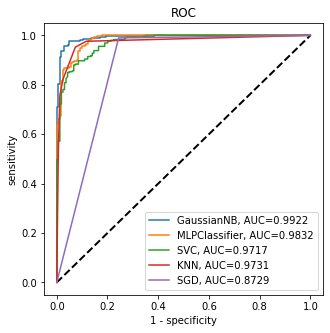

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn import metrics
skf = StratifiedKFold(n_splits=5)

x = data.data                    
y = data.target


X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.8)


models_new = {  
          "GaussianNB" : GaussianNB(),
          "MLPClassifier" : MLPClassifier(),
          "SVC" : SVC(probability=True),
          "KNN" : KNeighborsClassifier(),
          "SGD" : SGDClassifier(loss="modified_huber")   
         }
models_roc_auc = {name:None  for name in models_new.keys()}

for train_index, test_index in skf.split(X_train, y_train):
  x_train_fold, x_test_fold = x[train_index], x[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]
  
  for name in models_new.keys():
      model = models_new[name]
      clf = model.fit(x_train_fold, y_train_fold)     
      
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],color='black',lw=2,linestyle='--')
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.title('ROC')

for name, model in models_roc_auc.items():    
  clf = models_new[name]
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label=f"{name}, AUC="+str(round(auc, 4)))

plt.legend(loc='lower right')
plt.show()      

# Zadanie 1. -- Klasyfikacja wieloetykietowa

Powtórz powyższe zadania na zbiorze danych win uzyskanego metodą `load_wine` z modułu `sklearn.datasets`. Warto zwrócić uwagę, że ten zbiór definiuje 3 różne klasy.

Użyj `sklearn.multiclass.OneVsRestClassifier` żeby zastosować poprzednie klasyfikatory na nowych danych.

Przy liczeniu krzywy ROC i wartości AUC użyj `sklearn.preprocessing.label_binarize` na referncji i metody `ravel()` na macierzach wyjściowych przed narysowaniem.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.9, shuffle=True)

models_wine = {
          "LinearRegression" : LinearRegression(),
          "GPC" : GaussianProcessClassifier(),
          "GaussianNB" : GaussianNB(),
          "MLPClassifier" : MLPClassifier(),
          "SVC" : SVC(),
          "KNN" : KNeighborsClassifier(),
          "SGD" : SGDClassifier()
         }

print('Score data split 0.9:')
for name, model in models_wine.items():
  clf = OneVsRestClassifier(model).fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(name, score)

#change data split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.8, shuffle=True)

print("\nScore data split 0.8:")
for name, model in models_wine.items():
  clf = OneVsRestClassifier(model).fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(name, score)

Score data split 0.9:
LinearRegression 0.8881987577639752
GPC 0.32298136645962733
GaussianNB 0.7329192546583851
MLPClassifier 0.8695652173913043
SVC 0.6459627329192547
KNN 0.6956521739130435
SGD 0.4782608695652174

Score data split 0.8:
LinearRegression 0.958041958041958
GPC 0.34965034965034963
GaussianNB 0.965034965034965
MLPClassifier 0.6993006993006993
SVC 0.6993006993006993
KNN 0.6783216783216783
SGD 0.5454545454545454


In [ ]:
from sklearn.model_selection import cross_val_score

X = wine.data
y = wine.target

models_wine = {
          "LinearRegression" : LinearRegression(),
          "GPC" : GaussianProcessClassifier(),
          "GaussianNB" : GaussianNB(),
          "MLPClassifier" : MLPClassifier(),
          "SVC" : SVC(),
          "KNN" : KNeighborsClassifier(),
          "SGD" : SGDClassifier()
         }

for name, model in models_wine.items():
  print(name)
  mean_score = cross_val_score(OneVsRestClassifier(model), X, y, scoring="accuracy", cv = 5).mean()
  std_score = cross_val_score(OneVsRestClassifier(model), X, y, scoring="accuracy", cv = 5).std()
  print(f'Mean: {mean_score}')
  print(f'Std: {std_score}')
  print('-----------------------')

LinearRegression
Mean: 0.9774603174603176
Std: 0.011275428974716221
-----------------------
GPC
Mean: 0.4550793650793651
Std: 0.03660993343344825
-----------------------
GaussianNB
Mean: 0.9607936507936508
Std: 0.013352216409405144
-----------------------
MLPClassifier
Mean: 0.6592063492063491
Std: 0.22112575299918322
-----------------------
SVC
Mean: 0.6857142857142857
Std: 0.034342252031984905
-----------------------
KNN
Mean: 0.6915873015873016
Std: 0.06630210221307858
-----------------------
SGD
Mean: 0.5787301587301587
Std: 0.08921482194412848
-----------------------


In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(X_train)

score_SVC = []
for train_index, test_index in loo.split(X_train):
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
 
  svc = OneVsRestClassifier(models_wine['SVC']).fit(x_train_fold, y_train_fold)
  score_SVC.append(svc.score(X_test, y_test))
  
print('\nOverall Accuracy for model SVC:',
        mean(score_SVC)*100, '%')
print('\nStandard Deviation is for SVC:', stdev(score_SVC))


Overall Accuracy for model SVC: 88.57142857142857 %

Standard Deviation is for SVC: 0.32280285109067564


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.8)

In [ ]:
for name, model in models_wine.items():
  if name  != 'LinearRegression':
    clf = OneVsRestClassifier(model).fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f'{name}:\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('--------------------------------------------------------\n')

GPC:

[[ 4  0 43]
 [ 2  7 51]
 [ 2  1 33]]
              precision    recall  f1-score   support

           0       0.50      0.09      0.15        47
           1       0.88      0.12      0.21        60
           2       0.26      0.92      0.40        36

    accuracy                           0.31       143
   macro avg       0.54      0.37      0.25       143
weighted avg       0.60      0.31      0.24       143

--------------------------------------------------------

GaussianNB:

[[46  1  0]
 [ 4 55  1]
 [ 0  1 35]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.96      0.92      0.94        60
           2       0.97      0.97      0.97        36

    accuracy                           0.95       143
   macro avg       0.95      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

--------------------------------------------------------

MLPClassifier:

[[ 0 47  0]
 

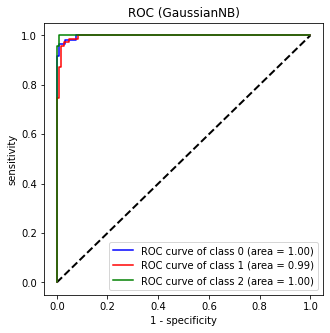

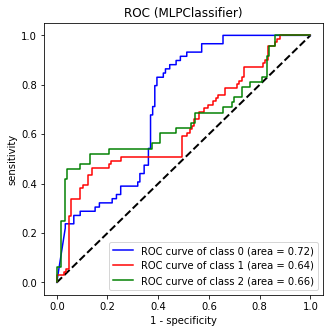

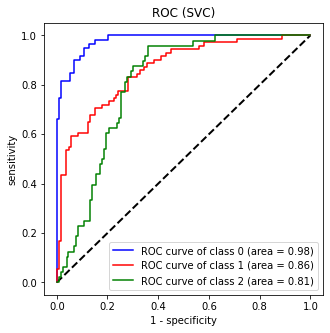

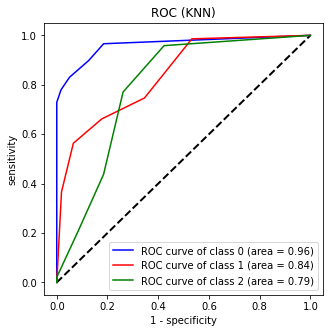

In [ ]:
from  itertools import cycle
from sklearn import datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_predict

Wine = datasets.load_wine()
X = Wine.data
y = Wine.target

models_wine = {  
          "GaussianNB" : GaussianNB(),
          "MLPClassifier" : MLPClassifier(),
          "SVC" : SVC(probability=True),
          "KNN" : KNeighborsClassifier()
         }

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

for name, model in models_wine.items():
  clf = OneVsRestClassifier(model)

  y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')

  plt.figure(figsize=(5,5))
  plt.plot([0,1],[0,1],color='black',lw=2,linestyle='--')
  plt.xlabel('1 - specificity')
  plt.ylabel('sensitivity')
  plt.title(f'ROC ({name})')

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(n_classes):    
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  colors = cycle(['blue', 'red', 'green'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, 
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))
  plt.legend(loc='lower right')
  plt.show()

# Zadanie 2. -- Optymalizacja hiperparametru

Użyj podwójnej walidacji krzyżowej żeby znaleźć średnią skuteczność klasyfikatora SVC (na danych `load_breast_cancer`) dla optymalnego parametru `C`.

Należy użyć podwójnej metody K-Fold: najpierw dzielimy zbiór na train/test, a potem w każdej iteracji zbiór train dodatowko dzielimy na train/dev kolejną pętlą walidacji krzyżowej. Za pomocą podziału train/dev szukamy jaki parametr `C` daje najlepszy wynik (załóżmy że przetestujemy ~10 różnych wartości równomiernie rozłożonych od 0.2 do 2 ), a potem użyjemy tą optymalną wartość żeby dokonać eksperymentu na zbiorze test.

In [ ]:
from sklearn.model_selection import RepeatedKFold

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.8)

range_C = [val/10 for val in range(2, 21)]

score = {}
for val in range_C:
  cv = RepeatedKFold(n_splits=10, n_repeats=2)
  # create model
  model = SVC(C=val)
  # evaluate model
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  # calculate performance
  score[val] = mean(scores)

best_C = max(score, key=score.get)
print(f'Best C param for SVC model: {best_C}')
model = SVC(C=best_C)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Best C param for SVC model: 2.0
[[128  41]
 [  3 284]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       169
           1       0.87      0.99      0.93       287

    accuracy                           0.90       456
   macro avg       0.93      0.87      0.89       456
weighted avg       0.91      0.90      0.90       456

